In [79]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# PH01-00

In [80]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)


In [81]:
def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

In [82]:
# calculate correlation
df[np.array(df.columns)].corr()

,Unnamed: 0,flowrate,total flow,pressure,pressure voltage,flowrate sampled,pv sampled,calculated pressure,Time_diff,flowrate_manual
Unnamed: 0,1.000000,-0.021197,0.997998,-0.003079,-0.003087,-0.021159,-0.003146,-0.006232,-0.035413,-0.021183
flowrate,-0.021197,1.000000,-0.018394,0.968607,0.956084,0.988210,0.958929,0.961346,-0.003352,0.992568
total flow,0.997998,-0.018394,1.000000,-0.001313,-0.001376,-0.018369,-0.001402,-0.004242,-0.035595,-0.018346
pressure,-0.003079,0.968607,-0.001313,1.000000,0.986366,0.963250,0.988081,0.988425,-0.004794,0.967103
pressure voltage,-0.003087,0.956084,-0.001376,0.986366,1.000000,0.951606,0.981219,0.979559,-0.005294,0.954461
flowrate sampled,-0.021159,0.988210,-0.018369,0.963250,0.951606,1.000000,0.963654,0.965984,0.000114,0.989870
pv sampled,-0.003146,0.958929,-0.001402,0.988081,0.981219,0.963654,1.000000,0.998308,-0.001628,0.961695
calculated pressure,-0.006232,0.961346,-0.004242,0.988425,0.979559,0.965984,0.998308,1.000000,-0.001957,0.964155
Time_diff,-0.035413,-0.003352,-0.035595,-0.004794,-0.005294,0.000114,-0.001628,-0.001957,1.000000,-0.002961
flowrate_manual,-0.021183,0.992568,-0.018346,0.967103,0.954461,0.989870,0.961695,0.964155,-0.002961,1.000000


Score:  0.9702490742560473
Error:  0.18630345969028944


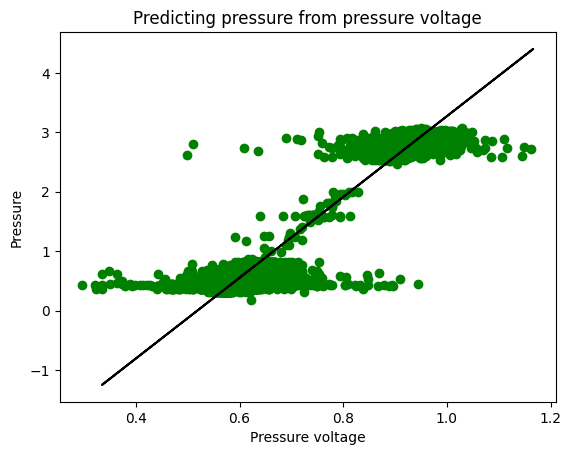

In [83]:
df_binary = df[['pressure', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['pressure']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Pressure')
plt.show()

Score:  0.9709437972578431
Error:  0.1851992841595066


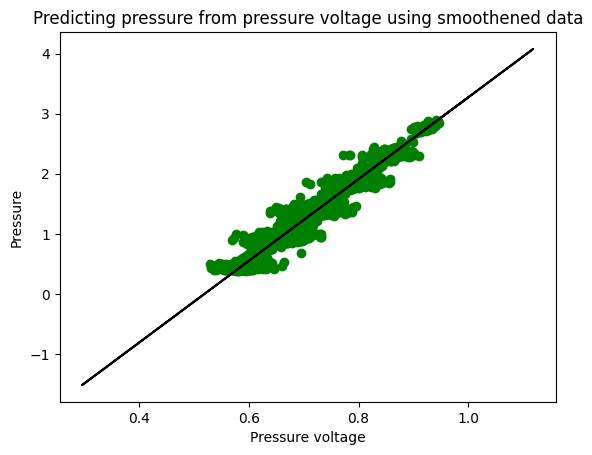

In [84]:
df_binary = df[['pressure', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)
  
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Pressure')
plt.show()

Score:  0.9809786066212047
Error:  0.1492733576281001


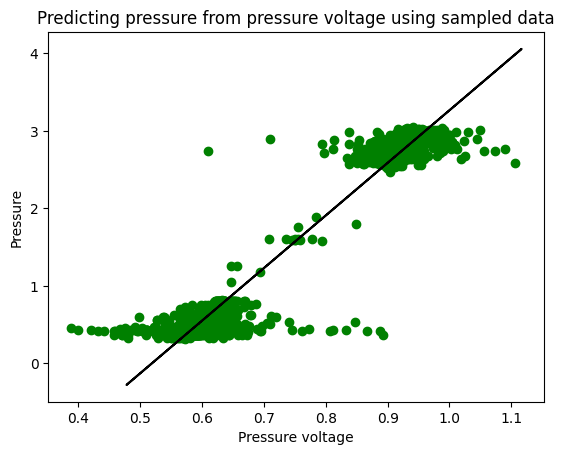

In [85]:
df_binary = df[['pressure voltage', 'pressure']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Pressure')
plt.show()


Score:  0.9776598515262944
Error:  0.1620655063001738


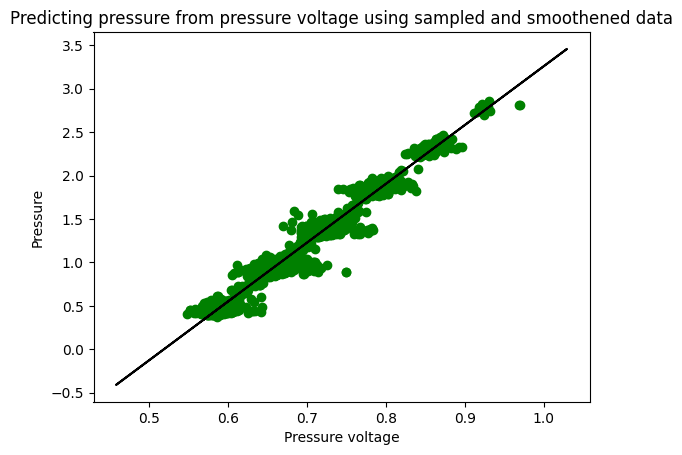

In [86]:
df_binary = df[['pressure voltage', 'pressure']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Pressure')
plt.show()


Score:  0.910672682949187
Error:  1.0887010801464425


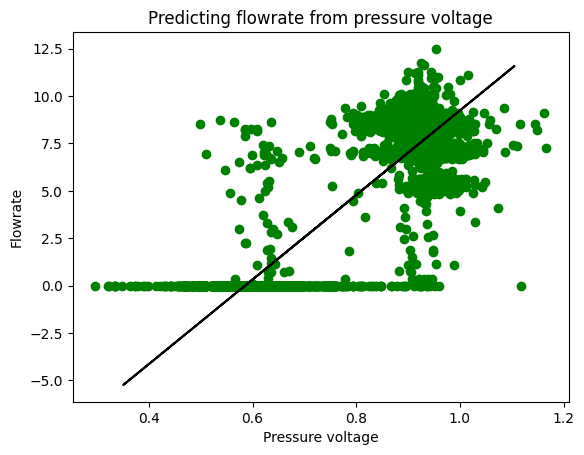

Input: pressure voltage
Predicted: flowrate


In [87]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
# plt.plot(y_train)
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9123693863023439
Error:  1.0821233689459333


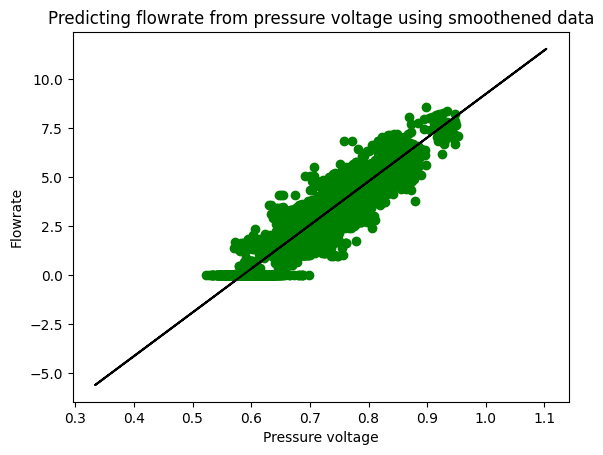

Input: pressure voltage
Predicted: flowrate


In [88]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9001655960864131
Error:  1.1606810656540683


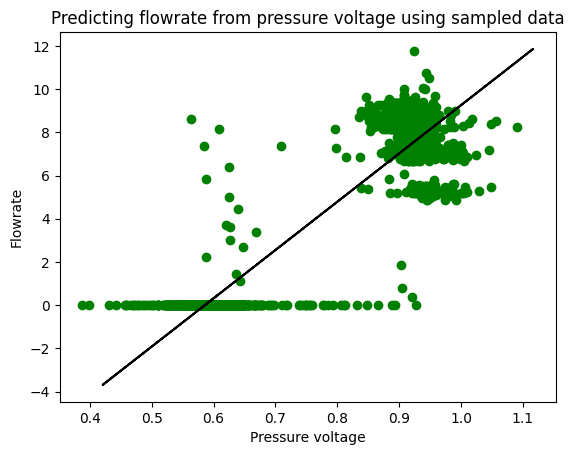

In [89]:
df_binary = df[['pressure voltage', 'flowrate_manual']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()


Score:  0.9139758417077348
Error:  1.0789685564824043


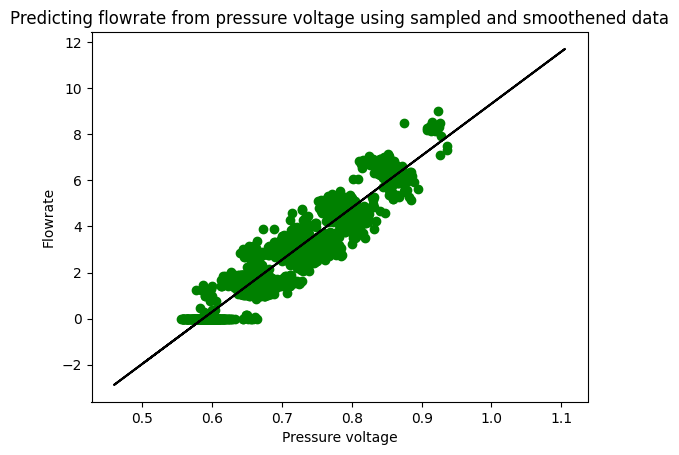

Input: sampled pressure voltage
Predicted: sampled flowrate


In [90]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

Score:  0.9337888367827607
Error:  0.9457526013716818


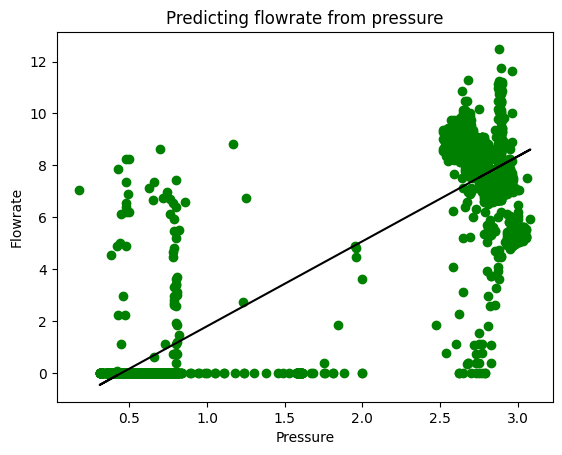

Input: pressure
Predicted: flowrate


In [91]:
df_binary = df[['flowrate_manual', 'pressure']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure")
print("Predicted: flowrate")

Score:  0.9344832503389853
Error:  0.9336644746073425


C:\Users\gandh\AppData\Local\Temp\ipykernel_16132\3208558916.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


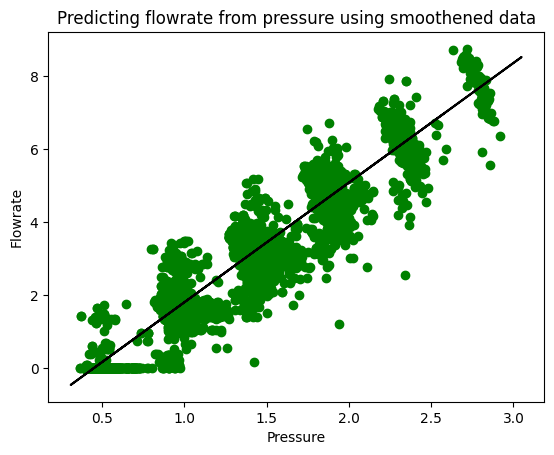

Input: smoothened pressure
Predicted: smoothened flowrate


In [92]:
df_binary = df[['flowrate_manual', 'pressure']]

X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure using smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()
print("Input: smoothened pressure")
print("Predicted: smoothened flowrate")

   flowrate_manual  pressure
0              0.0      0.63
1              0.0      0.63
2              0.0      0.62
3              0.0      0.62
4              0.0      0.62
    flowrate_manual  pressure
0               0.0      0.63
5               0.0      0.61
10              0.0      0.60
15              0.0      0.59
20              0.0      0.57
Score:  0.9331323336147007
Error:  0.9616471698792455


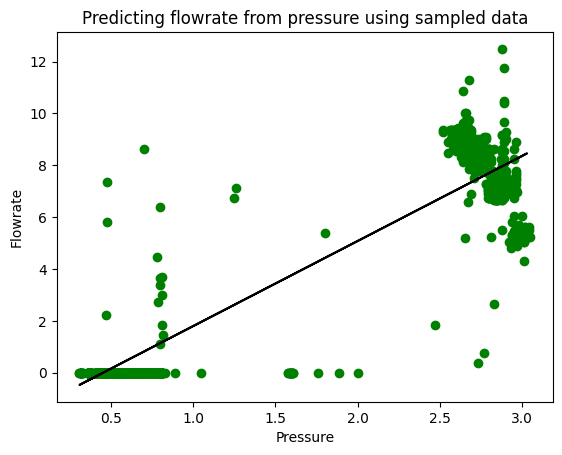

In [93]:
df_binary = df[['flowrate_manual', 'pressure']]
print(df_binary.head())
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
print(df_binary.head())
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure using sampled data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()


   flowrate_manual  pressure
0              0.0      0.63
1              0.0      0.63
2              0.0      0.62
3              0.0      0.62
4              0.0      0.62
    flowrate_manual  pressure
0               0.0      0.63
5               0.0      0.61
10              0.0      0.60
15              0.0      0.59
20              0.0      0.57
Score:  0.9382673741775583
Error:  0.9064758544341511


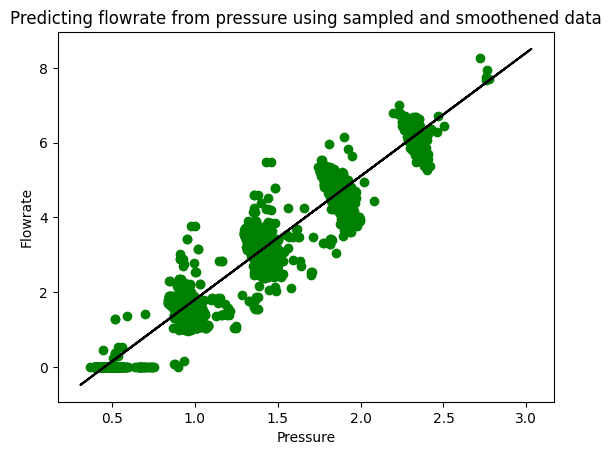

In [94]:
df_binary = df[['flowrate_manual', 'pressure']]
print(df_binary.head())
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
print(df_binary.head())
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure using sampled and smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()


# PH03-02

In [107]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0302(2).xlsx')

Score:  0.7754563626872938
Error:  0.9393335028682808


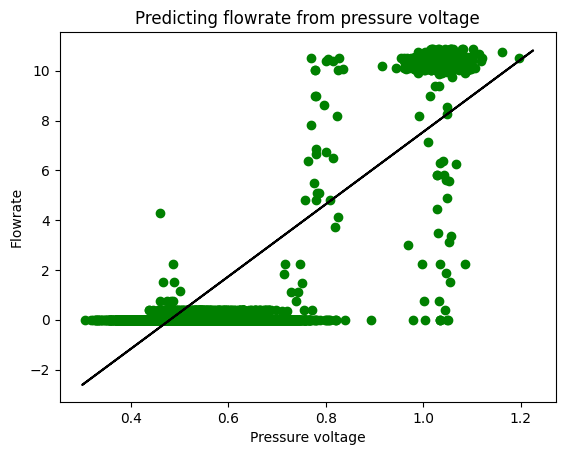

Input: pressure voltage
Predicted: flowrate


In [108]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting flowrate from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.7683960271840042
Error:  0.9318443122952679


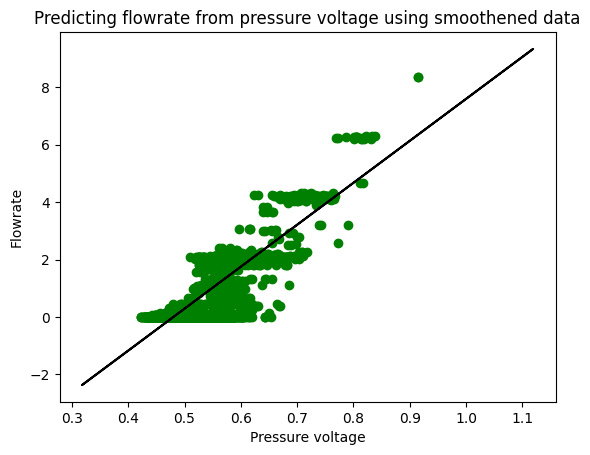

Input: pressure voltage
Predicted: flowrate


In [109]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.817332991241973
Error:  0.853964558215593


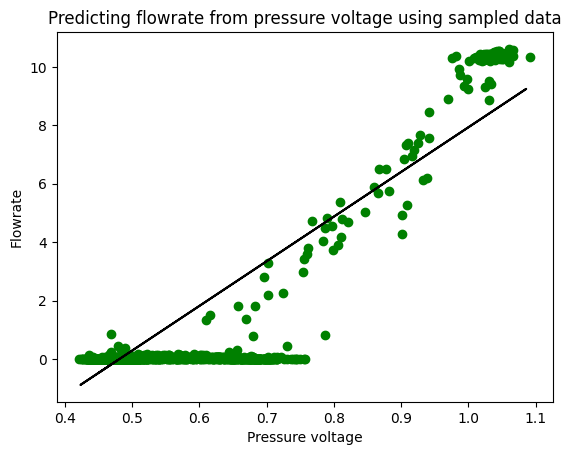

Input: sampled pressure voltage
Predicted: sampled flowrate


In [113]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

Score:  0.8340536072768447
Error:  0.8220562876722716


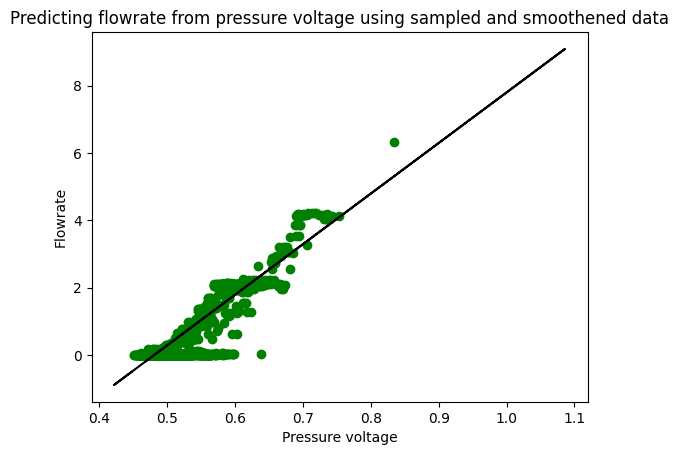

Input: sampled pressure voltage
Predicted: sampled flowrate


In [140]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

# PH03-03

In [142]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0303(2).xlsx')

Score:  0.904371751184653
Error:  0.6606224373349396


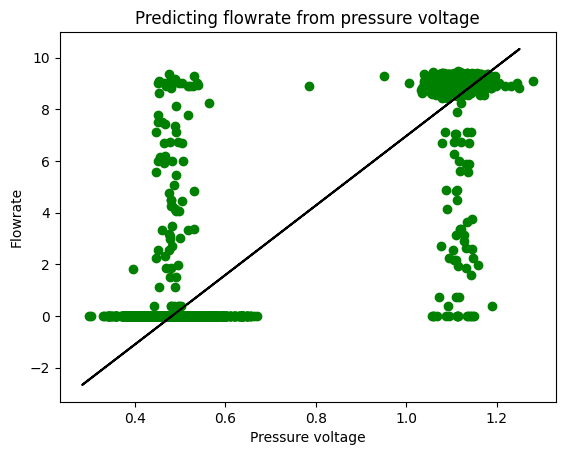

In [143]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting flowrate from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate') 
plt.show()

Score:  0.9156341916281847
Error:  0.6433244591949359


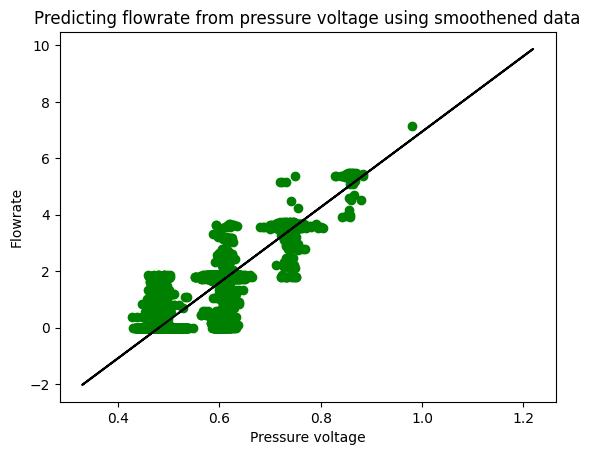

Input: pressure voltage
Predicted: flowrate


In [144]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9869894825878716
Error:  0.2696977199931452


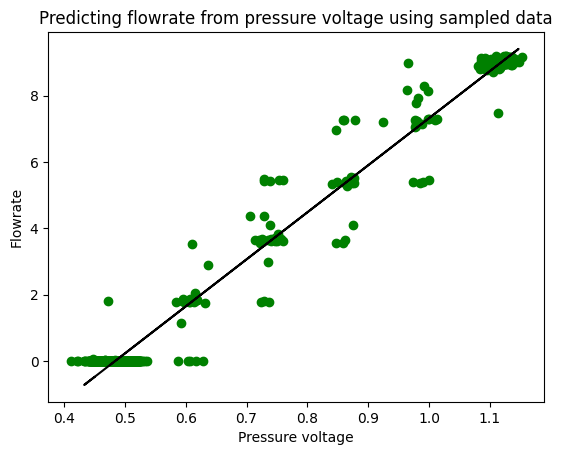

Input: sampled pressure voltage
Predicted: sampled flowrate


In [103]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

Score:  0.9879146285334325
Error:  0.24838883364832615


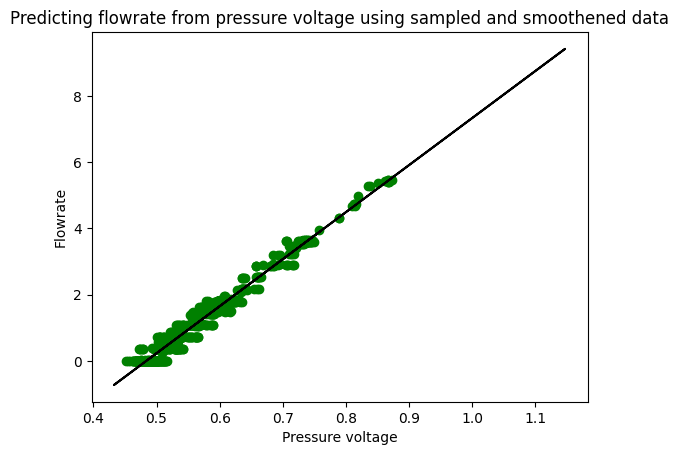

Input: sampled pressure voltage
Predicted: sampled flowrate


In [104]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")